## Importing Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

## Load Dataset

In [84]:
data = pd.read_csv('train_ML_IOT.csv')

## EDA

In [85]:
data.head(10)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [86]:
data.tail(10)

,DateTime,Junction,Vehicles,ID
48110,2017-06-30 14:00:00,4,10,20170630144
48111,2017-06-30 15:00:00,4,14,20170630154
48112,2017-06-30 16:00:00,4,16,20170630164
48113,2017-06-30 17:00:00,4,16,20170630174
48114,2017-06-30 18:00:00,4,17,20170630184
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224
48119,2017-06-30 23:00:00,4,12,20170630234


In [87]:
len(data)

48120

In [88]:
type(data)

pandas.core.frame.DataFrame

In [89]:
data["DateTime"]= pd.to_datetime(data["DateTime"])
data = data.drop(["ID"], axis=1) #dropping IDs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [90]:
def make_hist(junction=1):  #  I make a make_hist function for making histogram with kde plot, for plotting 4 junction
    data_junction = df[df['Junction'] == junction]
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data_junction['Vehicles'], kde=True, stat='probability')
    ax.set_title(f'Plot show the distribution of data in junction {junction}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

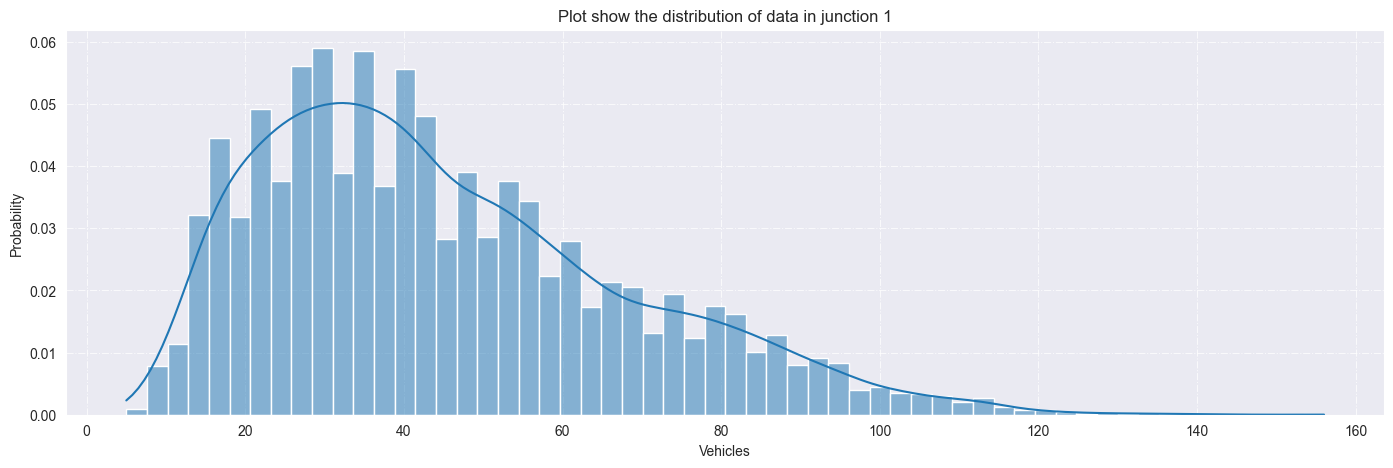

In [91]:
make_hist(1)

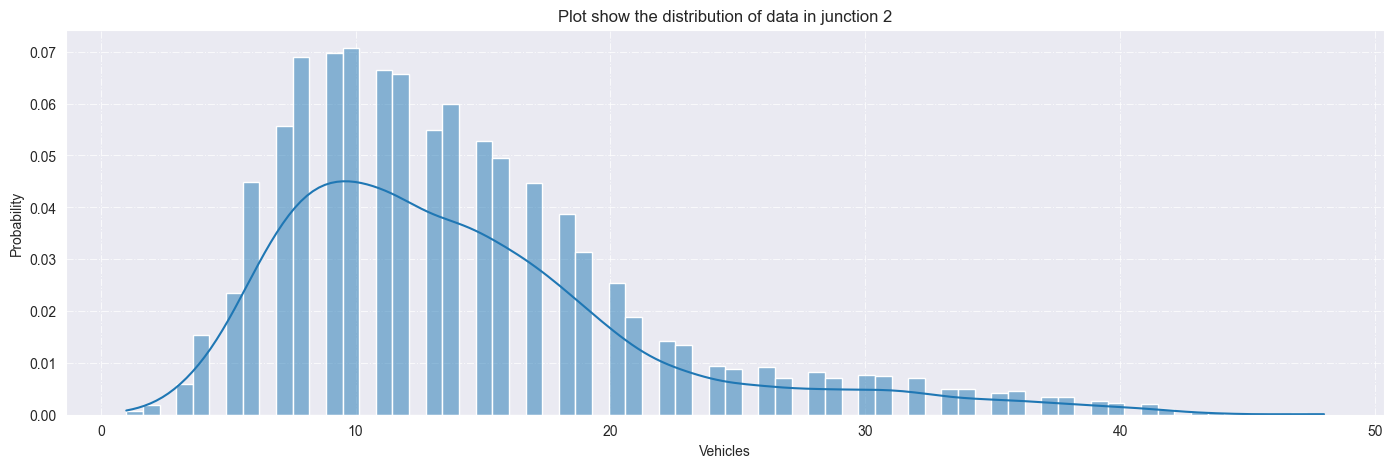

In [92]:
make_hist(2)

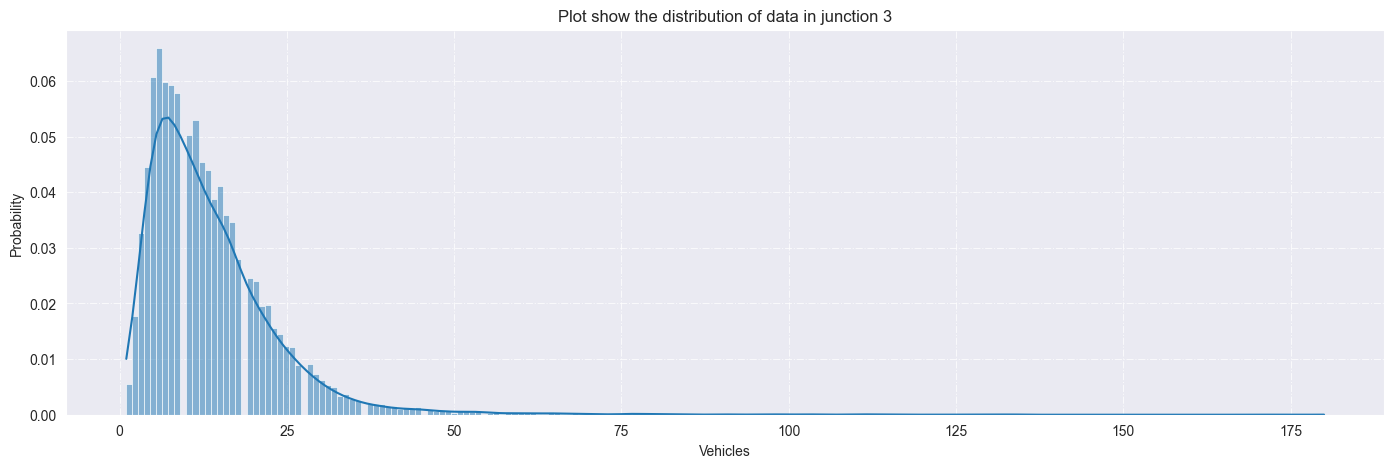

In [93]:
make_hist(3)

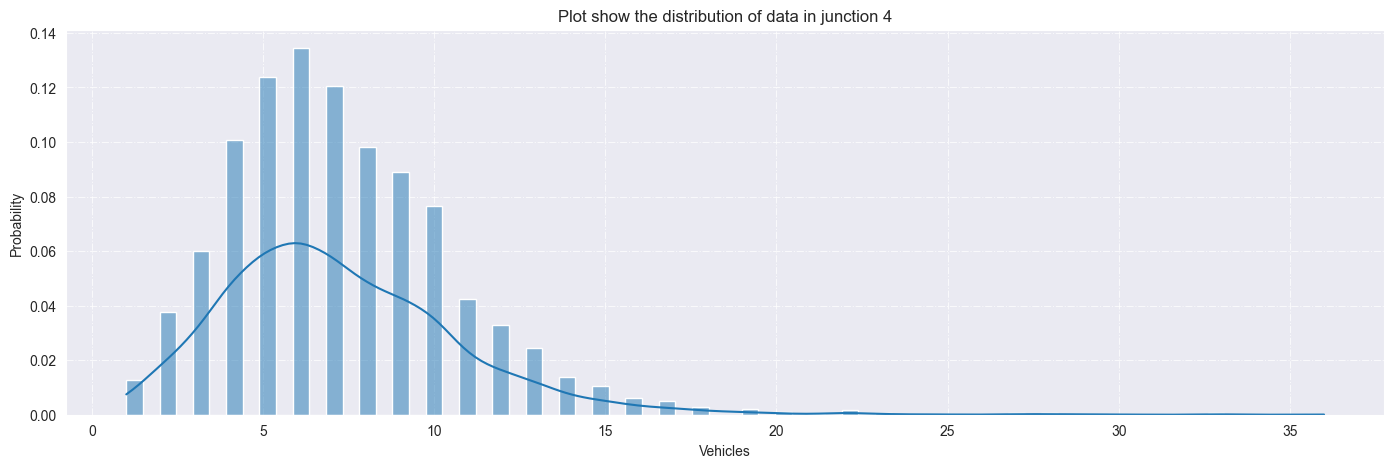

In [94]:
make_hist(4)

Text(0.5, 0, 'Date')

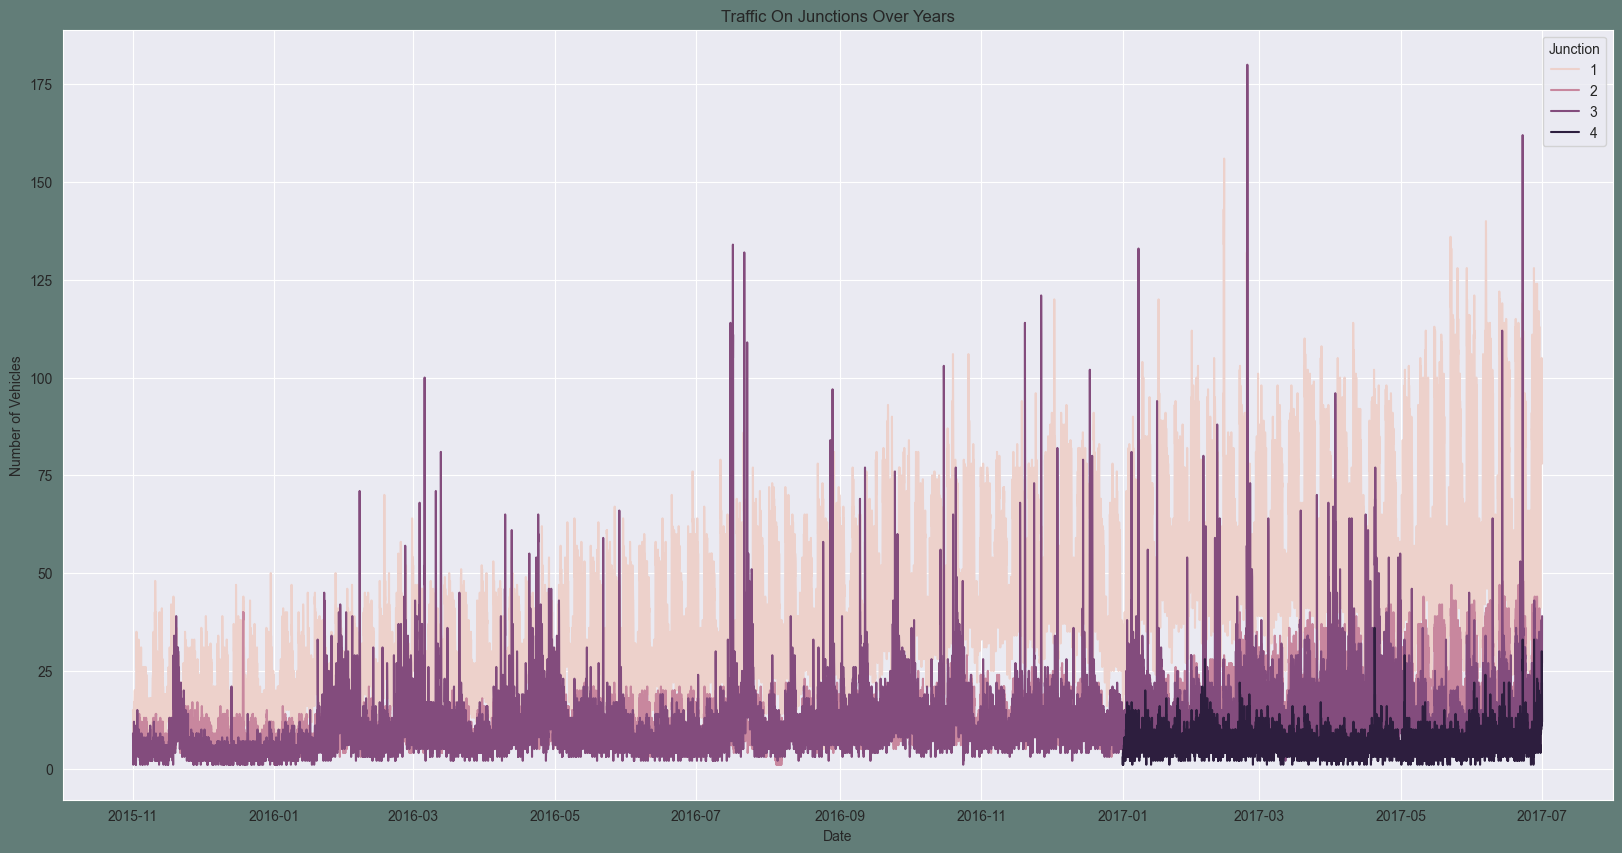

In [95]:
df=data.copy() 
#Let's plot the Timeseries
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,10),facecolor="#627D78")
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="Junction")
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

# It can be seen here that the first junction is visibly having an upward trend.
# The data for the fourth junction is sparse starting only after 2017
# Seasonality is not evident from the above plot, So we must explore datetime composition to figure out more about it.

In [ ]:
data = data[data['Junction'] == 1]
data = data['Vehicles']
data

In [ ]:
data = np.array(data).reshape(-1,1) # I convert it because I will use MinMaxScaler. It takes 2D array.
type(data)

In [ ]:
plt.plot(data)
plt.show()

In [ ]:
sc = MinMaxScaler()
data = sc.fit_transform(data)

In [ ]:
train = data[:int(0.8*len(data))]
test = data[int(0.8*len(data)):]

In [ ]:
def data_with_time_steps(data, time_steps):  # I create data with time steps. I will use it for LSTM. Why time steps? Because I want to predict the next value with the previous values.
    dataX = []
    datay = []
    for i in range(len(data)-time_steps):
        dataX.append(data[i:i+time_steps, 0])
        datay.append(data[i+time_steps, 0])
    return np.array(dataX), np.array(datay) # I convert them to numpy array because I will use LSTM.    

In [ ]:
time_steps = 24
X_train, y_train = data_with_time_steps(train, time_steps)
X_test, y_test = data_with_time_steps(test, time_steps)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])) # I convert it because I will use LSTM. It takes 3D array.
X_test = np.reshape(X_test, (X_test.shape[0], 1,  X_test.shape[1])) # Why did I use 1 in y axes? Because I have only 1 feature.

In [ ]:
model = Sequential()
model.add(LSTM(units = 128, input_shape = (1, time_steps)))
model.add(Dense(units = 64))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs = 23, batch_size = 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred = sc.inverse_transform(y_pred)
y_test = y_test.reshape(-1,1)
y_test = sc.inverse_transform(y_test)

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.show()